## <b> E-mail spam detection with ML</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import re
import nltk
nltk.download('stopwords') 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
spam = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
spam.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

### Taking the required Columns in the Dataset

In [5]:
spam = spam[['v1', 'v2']]
spam.columns = ['label', 'message']
spam.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
spam.shape

(5572, 2)

In [7]:
spam.groupby('label').size()

label
ham     4825
spam     747
dtype: int64

In [8]:
spam_counts = spam['label'].value_counts()

spam_percentage = (spam_counts['spam'] / len(spam)) * 100
ham_percentage  = (spam_counts['ham']  / len(spam)) * 100

print(f"Spam: {spam_percentage:.2f}%")
print(f"Ham : {ham_percentage:.2f}%")


Spam: 13.41%
Ham : 86.59%


### Plotting the Label in the Dataset

<Axes: xlabel='label'>

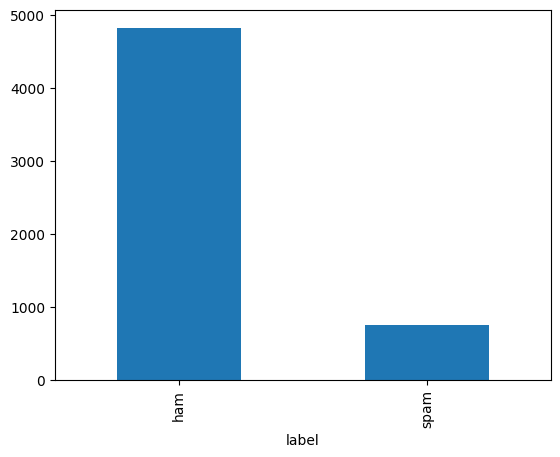

In [9]:
spam['label'].value_counts().plot(kind='bar')

In [10]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(spam)):
    review = re.sub('[^a-zA-Z]', ' ', spam['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
corpus[1:6]

['ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv']

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=7000
)

In [12]:
cv = CountVectorizer(max_features = 4000)
X = cv.fit_transform(corpus).toarray()
Y = pd.get_dummies(spam['label'])
Y = Y.iloc[:, 1].values

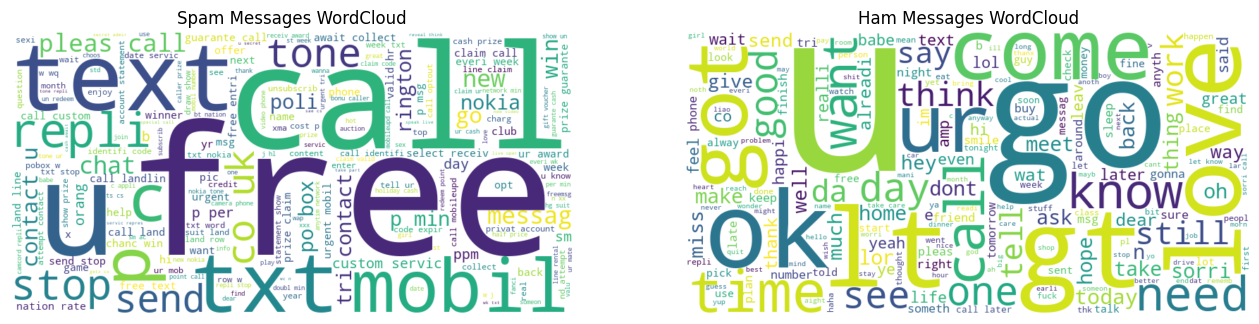

In [13]:
spam_corpus = []
ham_corpus = []

for i in range(len(spam)):
    if spam['label'][i] == 'spam':
        spam_corpus.append(corpus[i])
    else:
        ham_corpus.append(corpus[i])

spam_words = " ".join(spam_corpus)
ham_words = " ".join(ham_corpus)

spam_wc = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200
).generate(spam_words)

ham_wc = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200
).generate(ham_words)

# Plot side-by-side
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Spam Messages WordCloud")

plt.subplot(1, 2, 2)
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Ham Messages WordCloud")

plt.show()

### Splitting the Dataset into Training and Testing Set



In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=42)

### Creating the Models

In [15]:
# Random Forest Classifier
model1 = RandomForestClassifier()
model1.fit(X_train, Y_train)

# Decision Tree Classifier
model2 = DecisionTreeClassifier()
model2.fit(X_train, Y_train)

# Multinomial Naïve Bayes
model3 = MultinomialNB()
model3.fit(X_train, Y_train)
     

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [16]:
MultinomialNB()

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


### Prediction

In [17]:
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)

### Testing

In [18]:
# Random Forest Classifier
print("Random Forest Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred1))
print("Accuracy: ", accuracy_score(Y_test, pred1))
print("--------------------------------")

# Decision Tree Classifier
print("Decision Tree Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred2))
print("Accuracy: ", accuracy_score(Y_test, pred2))
print("--------------------------------")

# Multinomial Naïve Bayes
print("Multinomial Naïve Bayes")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred3))
print("Accuracy: ", accuracy_score(Y_test, pred3))
acc1 = accuracy_score(Y_test, pred1)
acc2 = accuracy_score(Y_test, pred2)
acc3 = accuracy_score(Y_test, pred3)

Random Forest Classifier
Confusion Matrix: 
[[964   1]
 [ 23 127]]
Accuracy:  0.97847533632287
--------------------------------
Decision Tree Classifier
Confusion Matrix: 
[[958   7]
 [ 21 129]]
Accuracy:  0.9748878923766816
--------------------------------
Multinomial Naïve Bayes
Confusion Matrix: 
[[955  10]
 [ 10 140]]
Accuracy:  0.9820627802690582


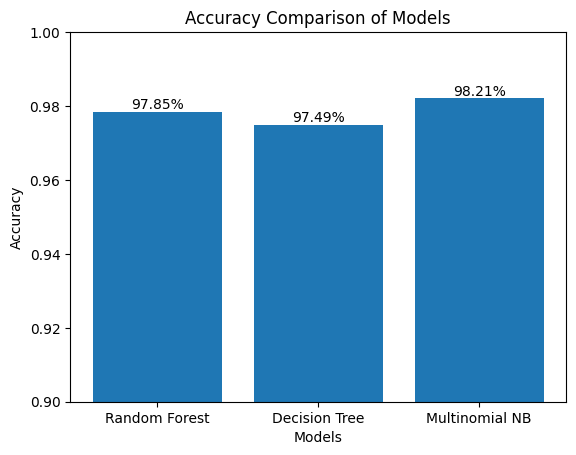

In [19]:
models = ['Random Forest', 'Decision Tree', 'Multinomial NB']
accuracies = [acc1, acc2, acc3]

plt.figure()
bars = plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models')
plt.ylim(0.9, 1)
for bar, acc in zip(bars, accuracies):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{acc * 100:.2f}%',
        ha='center',
        va='bottom'
    )

plt.show()

<Axes: >

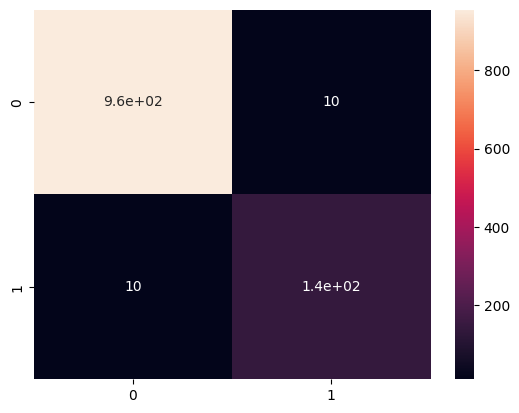

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred3)

import seaborn as sns
sns.heatmap(cm, annot=True)


In [21]:
report1 = classification_report(Y_test, pred1)
print("Classification Report for RFC \n", report1)
report2 = classification_report(Y_test, pred2)
print("Classification Report for DTC \n", report2)
report3 = classification_report(Y_test, pred3)
print("Classification Report for MNB \n", report3)

Classification Report for RFC 
               precision    recall  f1-score   support

       False       0.98      1.00      0.99       965
        True       0.99      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Classification Report for DTC 
               precision    recall  f1-score   support

       False       0.98      0.99      0.99       965
        True       0.95      0.86      0.90       150

    accuracy                           0.97      1115
   macro avg       0.96      0.93      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Classification Report for MNB 
               precision    recall  f1-score   support

       False       0.99      0.99      0.99       965
        True       0.93      0.93      0.93       150

    accuracy                           0.98      1115
   macro avg       0.96      0.9

### Best Model is Multinomial Naïve Bayes

Saving all the Models

In [22]:
filename = "RFC.pkl"
pickle.dump(model1, open(filename, 'wb'))
filename = "DTC.pkl"
pickle.dump(model2, open(filename, 'wb'))
filename = "MNB.pkl"
pickle.dump(model3, open(filename, 'wb'))
print("Saved all Models")

Saved all Models
